# Exploratory Data Analysis of UCI Spambase Dataset

## 1. Introduction
Briefly introduce the dataset and the purpose of the notebook.

## 2. Import Libraries
Import necessary libraries for data analysis and visualization.

## 3. Load the Data
Load the dataset and display the first few rows.

## 4. Data Overview
- Display basic information about the dataset (e.g., number of rows and columns).
- Check for missing values.

## 5. Data Distribution
- Visualize the distribution of the target variable (`is_spam`).
- Visualize the distribution of selected features.

## 6. Feature Correlations
- Compute and visualize correlations between features and the target variable.
- Display a heatmap of feature correlations.

## 7. Feature Analysis
- Analyze and visualize key features (e.g., words or characters frequencies).

## 8. Conclusion
Summarize key findings from the EDA.

This section introduces the UCI Spambase dataset, which is used to classify emails as spam or non-spam. The purpose of this notebook is to perform an exploratory data analysis (EDA) to understand the characteristics of the dataset and the features that distinguish spam emails from non-spam emails. We will visualize data distributions, examine feature correlations, and conduct feature importance analysis to gain insights that will inform our machine learning model development.

In [16]:
# 2. Import Libraries
# Import necessary libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In this section, we import essential libraries such as pandas and numpy for data manipulation, matplotlib and seaborn for data visualization, and scikit-learn for machine learning tasks, including model training and hyperparameter tuning.

In [17]:
# 3. Load the Data
# Load the dataset and define column names as per the dataset documentation.
df = pd.read_csv('../DATA/spambase.data', header=None)
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
              'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
              'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
              'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
              'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
              'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
              'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
              'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
              'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
              'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
              'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
              'capital_run_length_longest', 'capital_run_length_total', 'is_spam']

# Display the first few rows of the dataset to understand its structure.
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


We load the UCI Spambase dataset and assign appropriate column names to understand the data structure better. The head() function displays the first few rows of the dataset.

In [18]:
# 4. Data Overview
# Display basic information about the dataset, including the number of rows and columns, and check for missing values.
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(df.info())

# Check for missing values in each column.
print("Missing values in each column:\n", df.isnull().sum())


Dataset has 4601 rows and 58 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64


This section provides a general overview of the dataset, including its size (number of rows and columns) and the data types of each column. We also check for missing values to ensure data completeness before proceeding with further analysis.

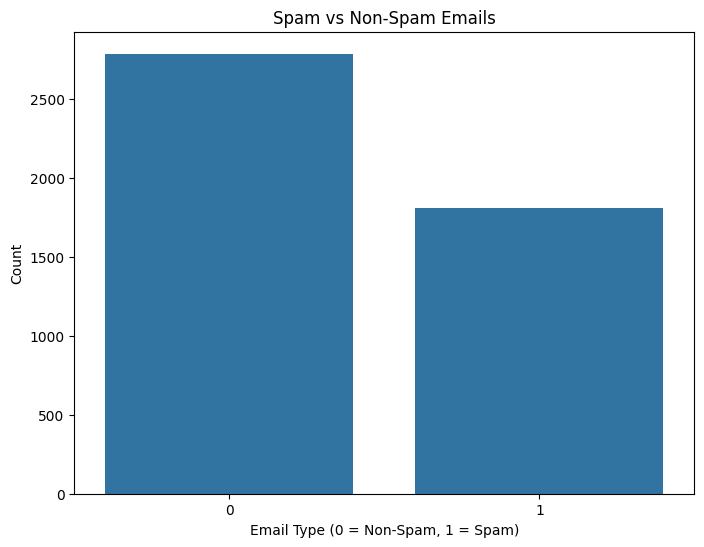

In [19]:
# 5. Data Distribution
# Visualize the distribution of the target variable ('is_spam').
plt.figure(figsize=(8, 6))
sns.countplot(x='is_spam', data=df)
plt.title('Spam vs Non-Spam Emails')
plt.xlabel('Email Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


Here, we visualize the distribution of the target variable (is_spam). This plot shows the number of spam and non-spam emails in the dataset, providing a quick overview of the class balance.

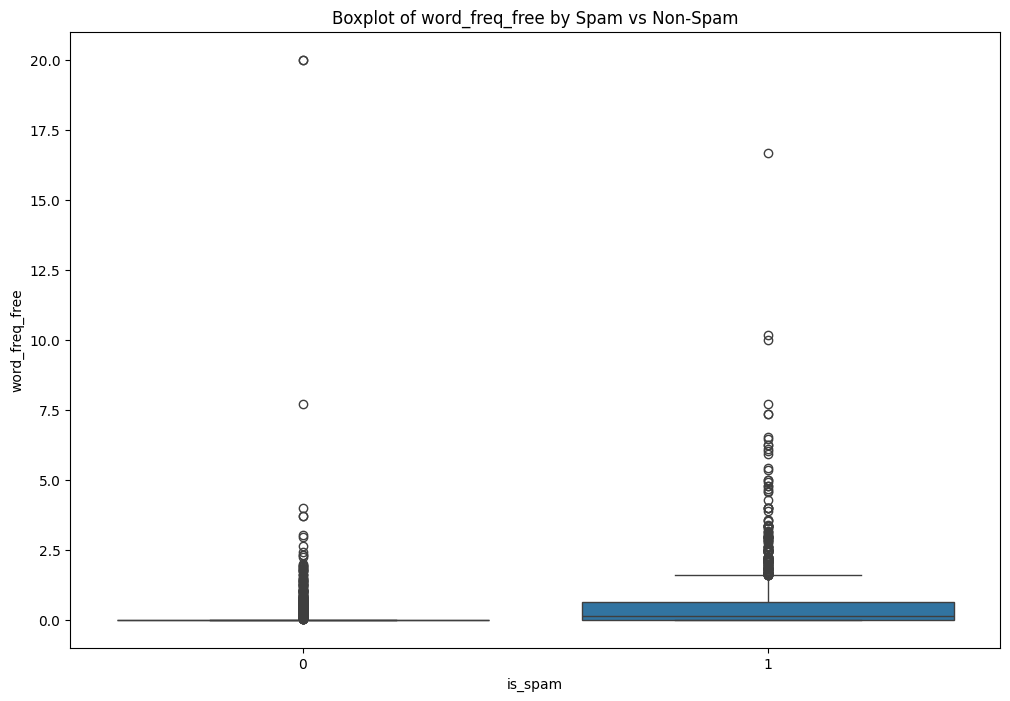

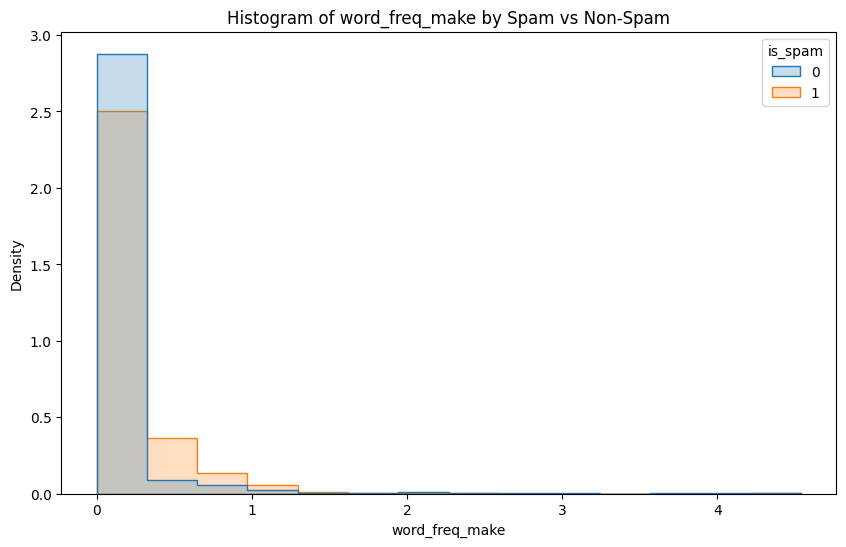

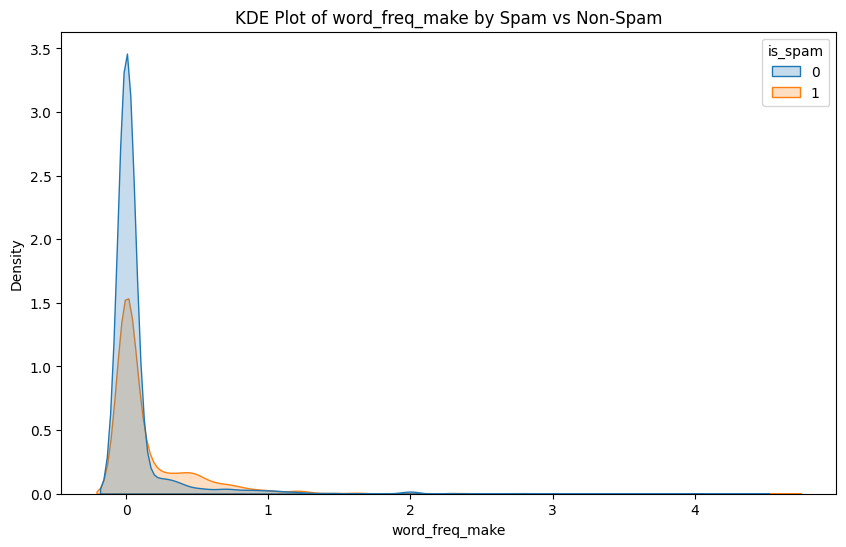

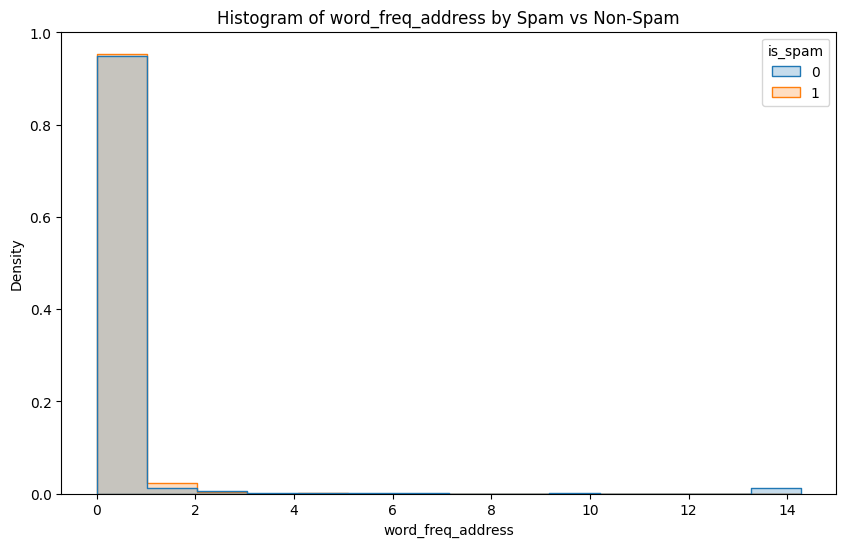

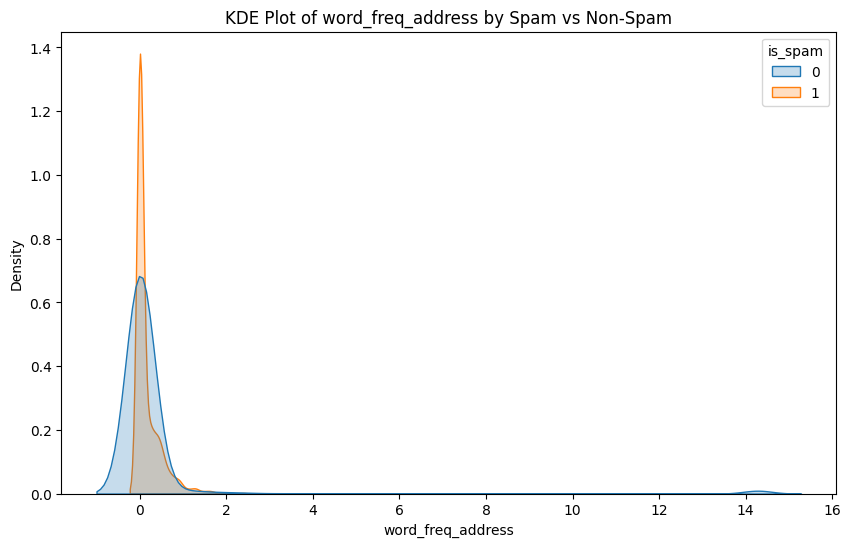

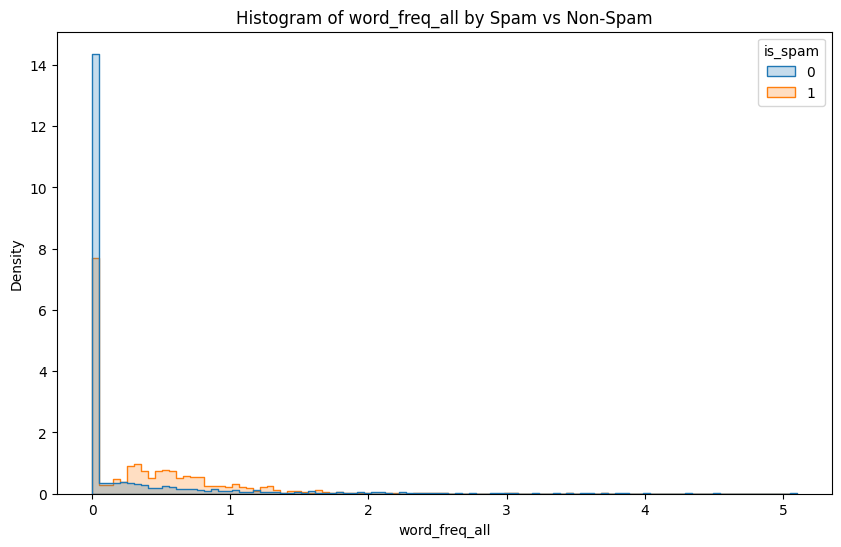

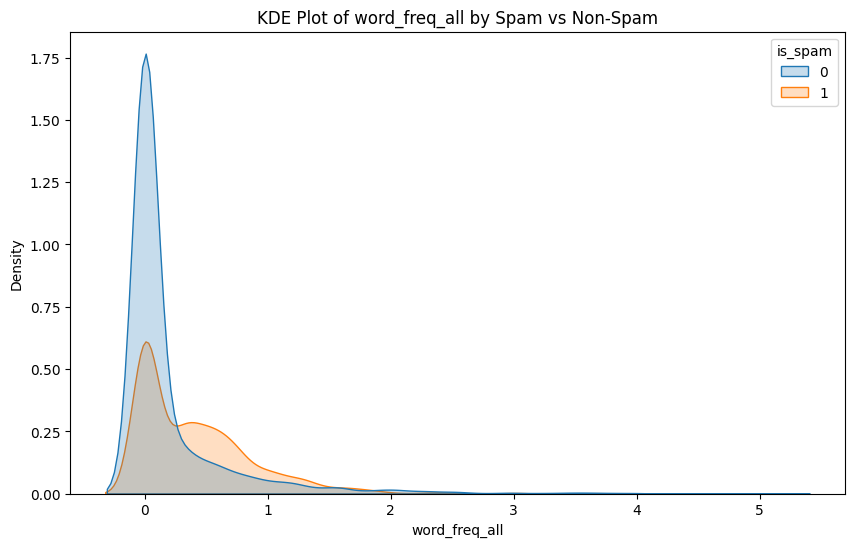

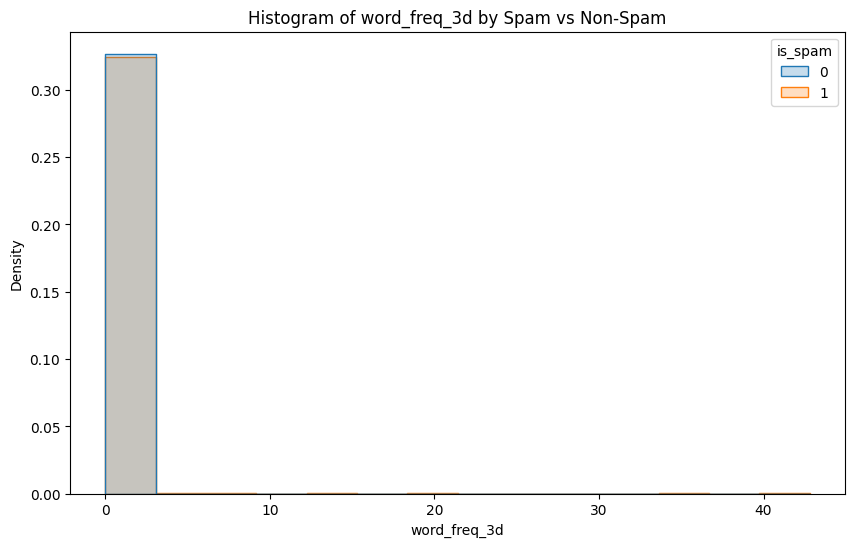

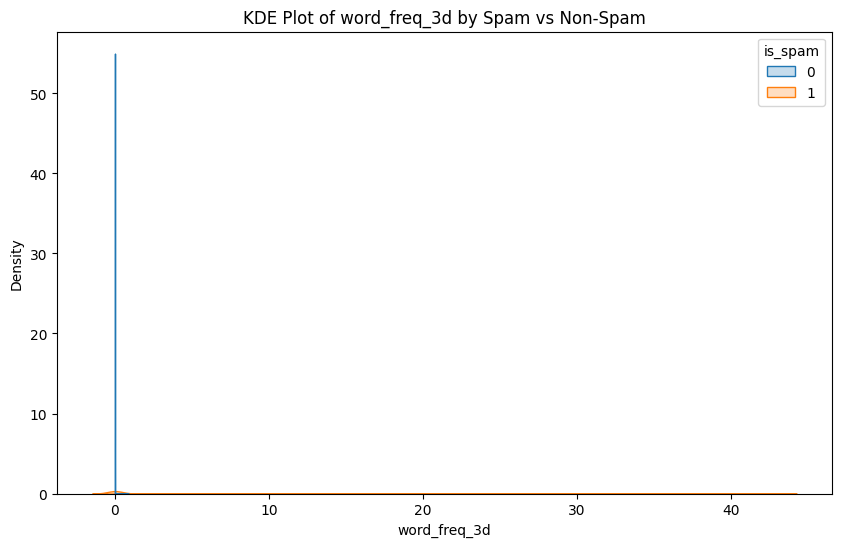

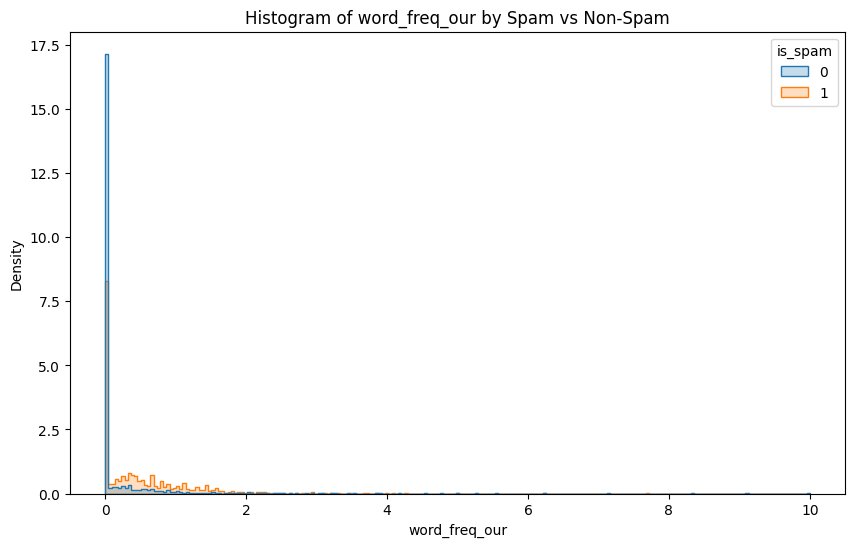

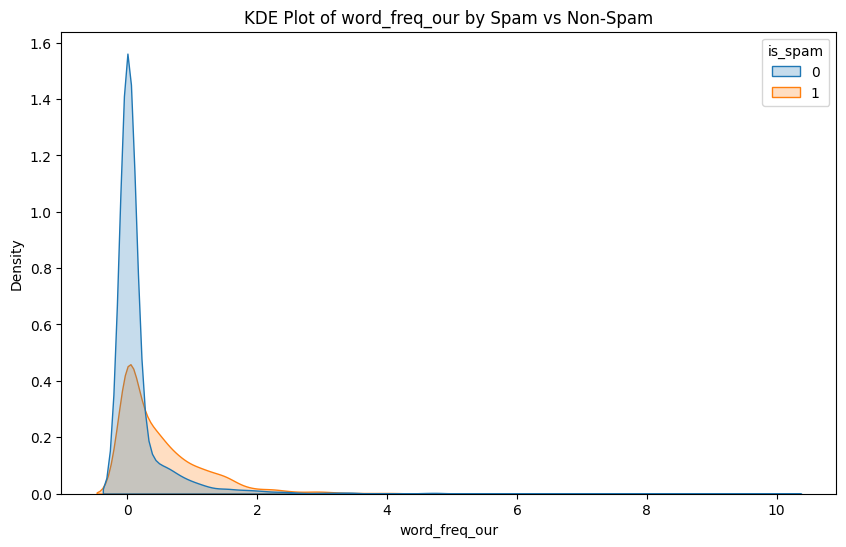

In [25]:
# Plot distributions for top 5 word frequency features
features_to_plot = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our']

plt.figure(figsize=(12, 8))
sns.boxplot(x='is_spam', y='word_freq_free', data=df)
plt.title('Boxplot of word_freq_free by Spam vs Non-Spam')
plt.show()

for feature in features_to_plot:
    # Plot histogram for each feature
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=feature, hue='is_spam', element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature} by Spam vs Non-Spam')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

    # Plot KDE plot for each feature
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='is_spam', fill=True)
    plt.title(f'KDE Plot of {feature} by Spam vs Non-Spam')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


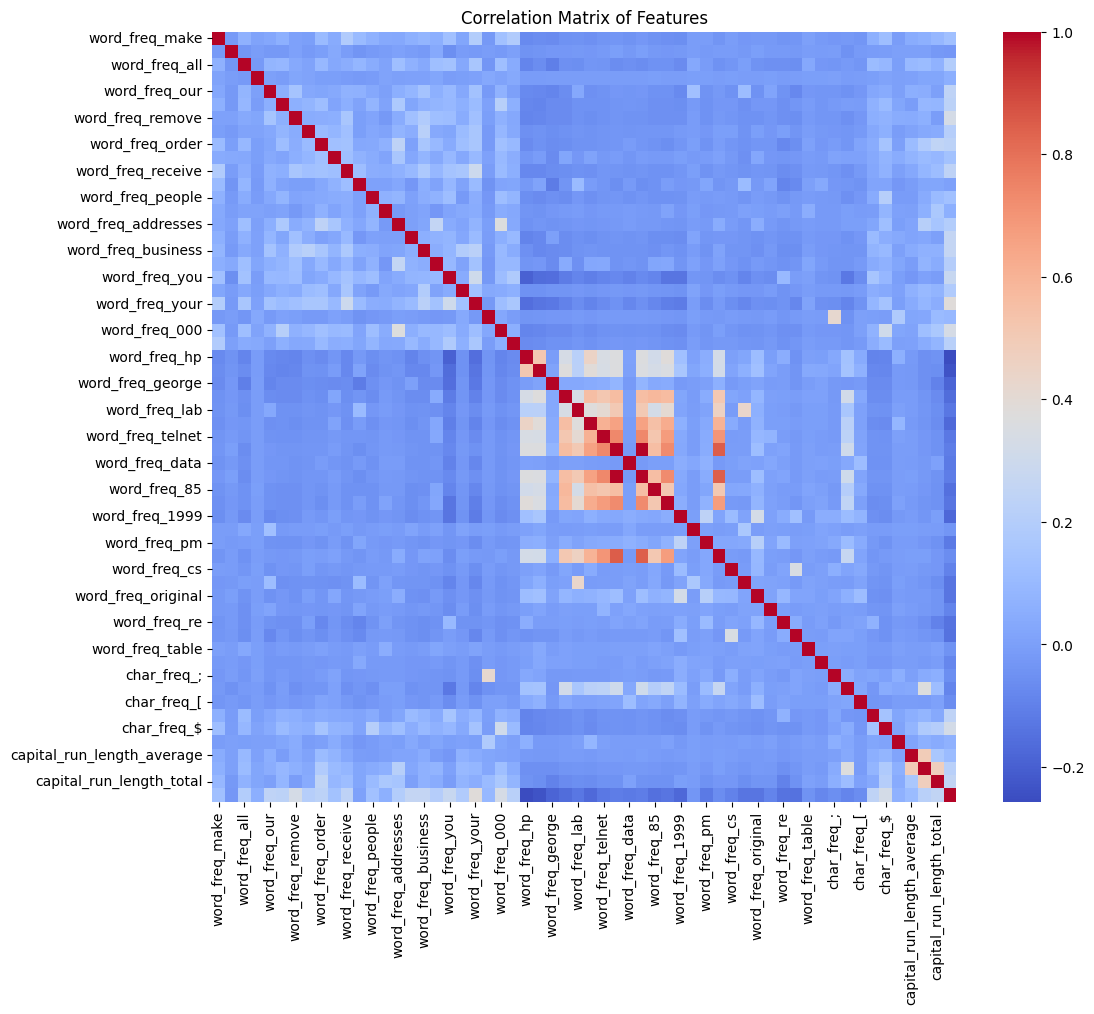

In [21]:
# 6. Feature Correlations
# Compute the correlation matrix to examine the relationships between features.
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


We compute and visualize the correlation matrix to examine the relationships between different features and the target variable (is_spam). The heatmap highlights any strong correlations that may influence feature selection or model performance.

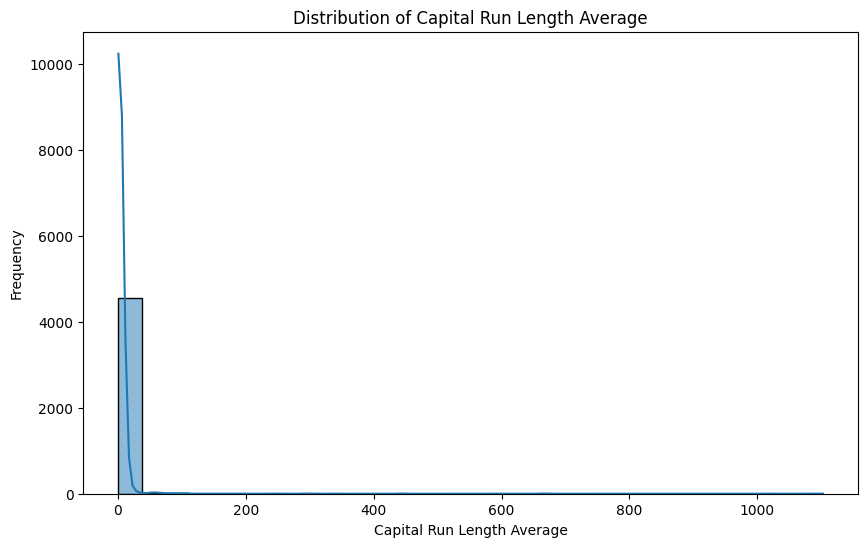

In [22]:
# 7. Feature Analysis
# Analyze the distribution of a specific feature, such as 'capital_run_length_average', to understand its impact.
plt.figure(figsize=(10, 6))
sns.histplot(df['capital_run_length_average'], bins=30, kde=True)
plt.title('Distribution of Capital Run Length Average')
plt.xlabel('Capital Run Length Average')
plt.ylabel('Frequency')
plt.show()


This section focuses on analyzing key features, such as capital_run_length_average, to understand their distribution and potential importance in distinguishing spam from non-spam emails.

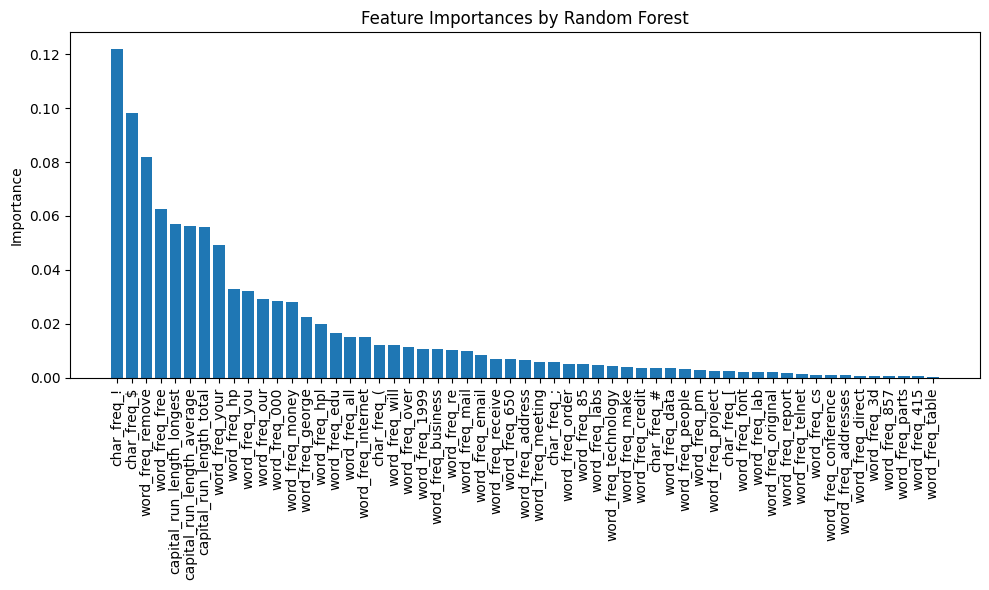

In [23]:
# Feature Importance using Random Forest
# Split the data into features (X) and target (y)
X = df.drop('is_spam', axis=1)
y = df['is_spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = indices[:10]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), df.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


We use a Random Forest model to calculate the importance of each feature in predicting whether an email is spam or non-spam. The feature importance plot shows which features are most influential, guiding further feature selection and model development.

In [24]:
# 8. Hyperparameter Tuning
# Define the parameter grid for GridSearchCV to find the best hyperparameters for the RandomForest model.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the RandomForest model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END m

Hyperparameter tuning is crucial for optimizing the performance of machine learning models. Here, we use GridSearchCV to test various hyperparameter combinations for the Random Forest model and identify the best set of hyperparameters based on cross-validated performance.

In conclusion, this EDA provided a comprehensive overview of the UCI Spambase dataset, including feature distributions, correlations, and importance analysis. We identified key features that distinguish spam emails from non-spam emails and optimized the Random Forest model using hyperparameter tuning. These insights will guide the development of robust spam classification models.